In [22]:
import numpy as np
import pandas as pd
from pathlib import Path
import statsmodels.api as sm
import arch as arch
%matplotlib inline

In [23]:
# Futures on Yen/Dollar Exchange rate (1 month to expiration)
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [24]:
# Trim dataset so 1/1/90 is starting date
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


<AxesSubplot:title={'center':'Yen Future Settlment Prices'}, xlabel='Date'>

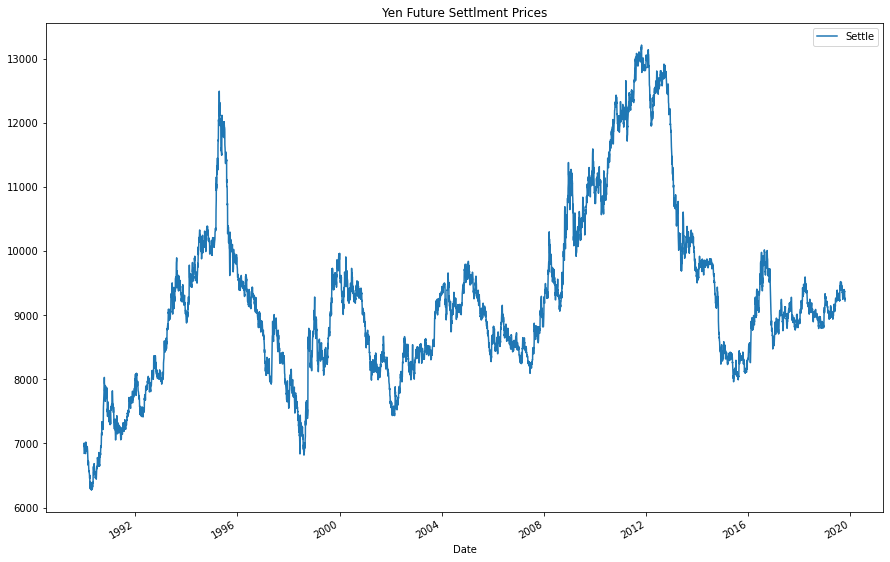

In [25]:
# Plot settle column from dataframe
yen_futures.Settle.plot(figsize=[15,10], title='Yen Future Settlment Prices',legend=True)

In [26]:
# Decomposing Settle prices into trend and noise
ts_noise, ts_trend = sm.tsa.filters.hpfilter(yen_futures['Settle'])

In [27]:
# Settle price dataframe
df_yen_futures = yen_futures[['Settle']].copy()
df_yen_futures['noise'] = ts_noise
df_yen_futures['trend'] = ts_trend
df_yen_futures.tail()

,Settle,noise,trend
Date,,,
2019-10-09,9338.0,24.939247,9313.060753
2019-10-10,9303.5,-5.868559,9309.368559
2019-10-11,9251.0,-54.454594,9305.454594
2019-10-14,9265.0,-36.423060,9301.423060
2019-10-15,9221.5,-75.844123,9297.344123


<AxesSubplot:title={'center':'2015-2019: Settle vs. Trend'}, xlabel='Date'>

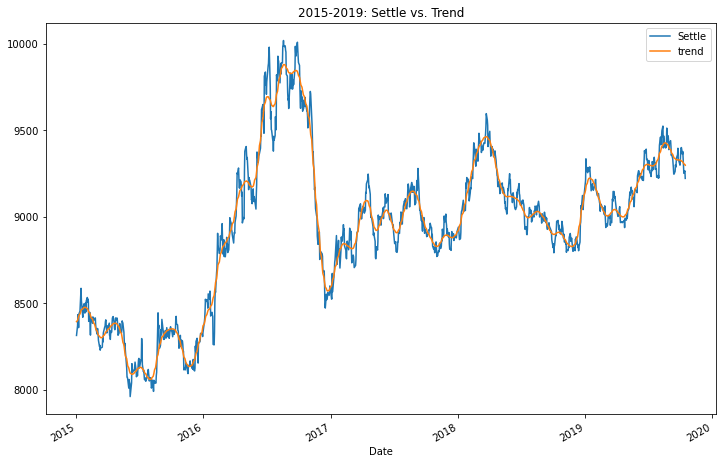

In [28]:
# Plot settle price vs. trend price for 2015-2019
current_2015 = df_yen_futures.loc["2015":]
current_2015.plot(y=["Settle", "trend"], figsize=[12,8], title = "2015-2019: Settle vs. Trend")

<AxesSubplot:title={'center':'Noise'}, xlabel='Date'>

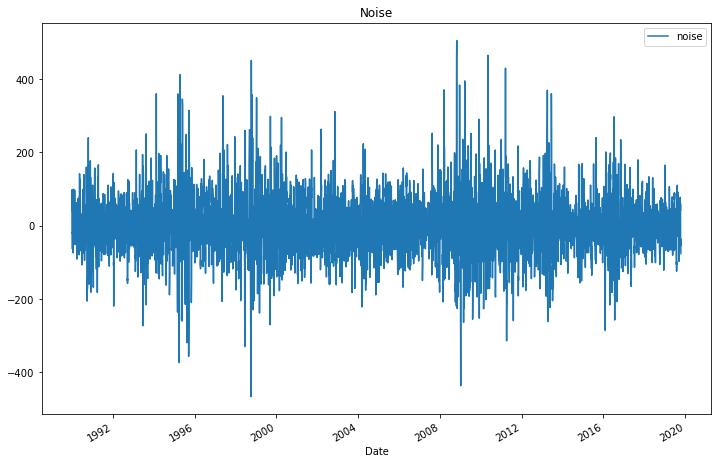

In [29]:
# Plot settle noise
df_yen_futures.plot(y="noise", figsize=[12,8], title = "Noise")

In [30]:
# Series of settle price percentage returns
returns = (yen_futures[["Settle"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Settle
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


<AxesSubplot:xlabel='Date'>

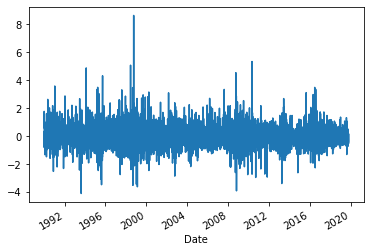

In [31]:
# Plot Settle price returns
returns.Settle.plot()

In [32]:
from statsmodels.tsa.stattools import adfuller
adfuller(returns.Settle)

(-87.67736238539426,
 0.0,
 0,
 7513,
 {'1%': -3.4312206955500963,
  '5%': -2.8619247816139843,
  '10%': -2.5669748148389813},
 15724.766827334091)

In [33]:
import statsmodels.api as sm

from statsmodels.tsa.arima_model import ARMA
# ARMA Model
model_ARMA = ARMA(returns.values, order=(2,1))
# Fit the model and assign variable
result_ARMA = model_ARMA.fit()
# Show results
result_ARMA.summary()

/Users/dustinfeinberg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7514
Model:                     ARMA(2, 1)   Log Likelihood               -7894.071
Method:                       css-mle   S.D. of innovations              0.692
Date:                Wed, 11 Aug 2021   AIC                          15798.142
Time:                        14:14:53   BIC                          15832.765
Sample:                             0   HQIC                         15810.030
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.008      0.804      0.422      -0.009       0.022
ar.L1.y       -0.3062      1.277     -0.240      0.811      -2.810       2.197
ar.L2.y       -0.0019      0.019     -0.099      0.921      -0.040       0.036
ma.L1.y        0.2947      1.277      0.231      0.818      -2.209       2.798
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3346           +0.0000j            3.3346            0.5000
AR.2         -157.1807           +0.0000j          157.1807            0.5000
MA.1           -3.3935           +0.0000j            3.3935            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 day forecast'}>

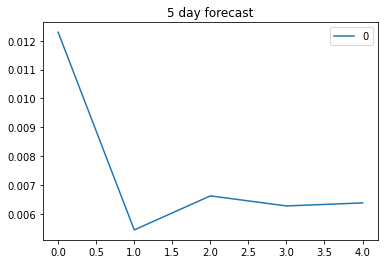

In [34]:
# Plot 5 day forecast
pd.DataFrame(result_ARMA.forecast(steps=5)[0]).plot(title="5 day forecast")

In [35]:
from statsmodels.tsa.arima_model import ARIMA
# Estimate ARIMA Model
model_ARIMA = ARIMA (yen_futures["Settle"], order = (5, 1, 1))
# Fit the model
result_ARIMA = model_ARIMA.fit()

/Users/dustinfeinberg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dustinfeinberg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been pr

In [36]:
# Output model summary results
result_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Settle   No. Observations:                 7514
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -41944.619
Method:                       css-mle   S.D. of innovations             64.281
Date:                Wed, 11 Aug 2021   AIC                          83905.238
Time:                        14:14:55   BIC                          83960.635
Sample:                             1   HQIC                         83924.259
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3161      0.700      0.452      0.652      -1.056       1.688
ar.L1.D.Settle     0.2822      0.699      0.404      0.687      -1.088       1.653
ar.L2.D.Settle     0.0007      0.016      0.043      0.966      -0.030       0.032
ar.L3.D.Settle    -0.0126      0.012     -1.032      0.302      -0.037       0.011
ar.L4.D.Settle    -0.0137      0.015     -0.889      0.374      -0.044       0.016
ar.L5.D.Settle    -0.0012      0.018     -0.064      0.949      -0.036       0.034
ma.L1.D.Settle    -0.2972      0.699     -0.425      0.671      -1.667       1.073
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8918           -1.3786j            2.3408           -0.1002
AR.2            1.8918           +1.3786j            2.3408            0.1002
AR.3           -2.2700           -3.0206j            3.7785           -0.3526
AR.4           -2.2700           +3.0206j            3.7785            0.3526
AR.5          -11.0686           -0.0000j           11.0686           -0.5000
MA.1            3.3648           +0.0000j            3.3648            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 day Futures Price Prediction'}>

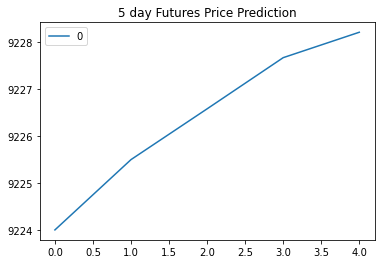

In [37]:
# Plot the 5 day price prediction
pd.DataFrame(result_ARIMA.forecast(steps=5)[0]).plot(title="5 day Futures Price Prediction")

In [39]:
from arch import arch_model

In [40]:
# Estimate a GARCH Model
model_GARCH = arch_model(returns.Settle, mean="Zero", vol="GARCH", p=2, q=1)
# Fit the model
results_GARCH = model_GARCH.fit(disp="off")

In [41]:
# Summarize the model results
results_GARCH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Settle   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7461.93
Distribution:                  Normal   AIC:                           14931.9
Method:            Maximum Likelihood   BIC:                           14959.6
                                        No. Observations:                 7514
Date:                Wed, Aug 11 2021   Df Residuals:                     7514
Time:                        14:16:13   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.2896e-03  2.057e-03      2.085  3.707e-02  [2.571e-04,8.322e-03]
alpha[1]       0.0381  1.282e-02      2.970  2.974e-03  [1.295e-02,6.321e-02]
alpha[2]       0.0000  1.703e-02      0.000      1.000 [-3.338e-02,3.338e-02]
beta[1]        0.9536  1.420e-02     67.135      0.000      [  0.926,  0.981]
=============================================================================

Covariance estimator: robust
"""

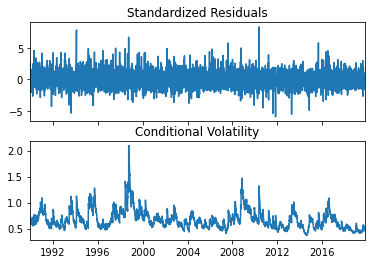

In [42]:
# Plot model estimate to show annualized volatility
fig = results_GARCH.plot()

In [43]:
# Discover last day within dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2019-10-15'

In [44]:
# Create 5 day prediction of volatility
forecast_horizon = 5
# Start the prediction using last day identified above
forecasts = results_GARCH.forecast(start=last_day, horizon=forecast_horizon)

/Users/dustinfeinberg/opt/anaconda3/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [45]:
# Annulaized forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2019-10-15,7.434032,7.475729,7.516851,7.55741,7.597418


In [46]:
# Transpose forecast
final = intermediate.dropna().T
final.head()

Date,2019-10-15
h.1,7.434032
h.2,7.475729
h.3,7.516851
h.4,7.557410
h.5,7.597418


<AxesSubplot:title={'center':'5 day prediction of volatility'}>

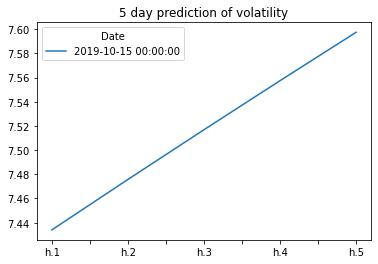

In [47]:
# Plot forecast
final.plot(title="5 day prediction of volatility")

### The yen is predicted to undergo signficant volatility over the next five days. The yen is a buy here for someone with high risk tolerance